In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotnine
from plotnine import *
import itertools
import math
from prettytable import PrettyTable
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection, preprocessing
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve, balanced_accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
from scipy.spatial import distance
from imblearn.over_sampling import SMOTE
import copy
import warnings
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode(connected = True)
%matplotlib inline
sns.set(style = "ticks", context = "talk")

In [ ]:
# All dataset paths
path_all = "/content/SpotifyFeatures_Cleaned.csv" 
path_acoustic = "/content/SpotifyFeatures_Cleaned_Acoustic.csv"
path_chill = "/content/SpotifyFeatures_Cleaned_Chill.csv"
path_dance = "/content/SpotifyFeatures_Cleaned_Dance.csv"
path_happy = "/content/SpotifyFeatures_Cleaned_Happy.csv"
path_loud = "/content/SpotifyFeatures_Cleaned_Loud.csv"
CATEGORY_DICT = {0: "All", 1: "Acoustic", 2: "Chill", 3: "Dance", 4: "Happy", 5: "Loud", 6: "A Capella", 7: "Alternative", 8: "Blues", 9: "Classical", 10: "Country", 11: "Dance", 12: "Electronic", 13: "Folk", 14: "Hip-Hop", 15: "Indie", 16: "Jazz", 17: "Movie", 18: "Opera", 19: "Pop", 20: "R&B", 21: "Rap", 22: "Reggae", 23: "Reggaeton", 24: "Rock", 25: "Ska", 26: "Soul", 27: "Soundtrack", 28: "World"}

def get_data(csv_path:str)->pd.DataFrame:
  """
    Return a pd.DataFrame for the csv at csv_path
  """
  df = pd.read_csv(csv_path)
  if "Unnamed: 0" in df.columns:
    df = df.drop(["Unnamed: 0"], axis = 1)
  if "cluster" in df.columns:
    df = df.drop(["cluster"], axis = 1)
  return df

def select_data(category:int)->pd.DataFrame:
  """
    Return the data set corresponds to the category number in the CATEGORY_DICT
  """
  if category == 1:
    return get_data(path_acoustic)
  elif category == 2:
    return get_data(path_chill)
  elif category == 3:
    return get_data(path_dance)
  elif category == 4:
    return get_data(path_happy)
  elif category == 5:
    return get_data(path_loud)
  elif category > 5 and category < 29:
    genre = CATEGORY_DICT[category]
    data_all = get_data(path_all)
    return data_all[data_all["genre"] == genre]
  else:
    return get_data(path_all)



In [ ]:
# Load all data
data_all = get_data(path_all)
data_acoustic = get_data(path_acoustic)
data_chill = get_data(path_chill)
data_dance = get_data(path_dance)
data_happy = get_data(path_happy)
data_loud = get_data(path_loud)

In [ ]:
# Try will all data
data = get_data(path_all)

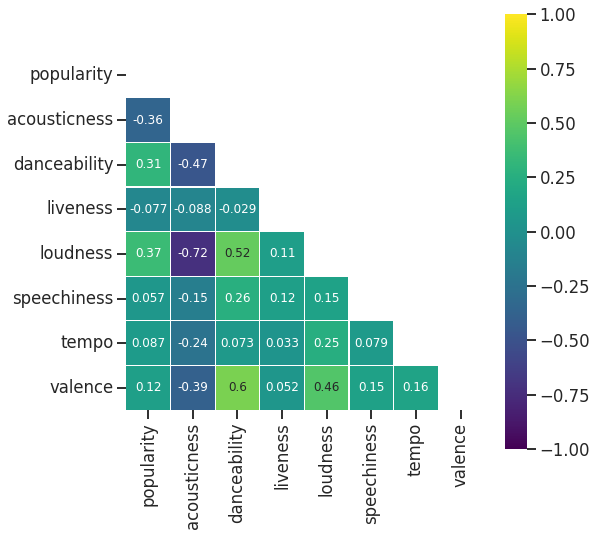

In [ ]:
# Correlations
corr = data.corr()
fig, ax = plt.subplots(figsize=(8,8)) 
ax = sns.heatmap(corr, mask=np.triu(corr),
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True);

No handles with labels found to put in legend.


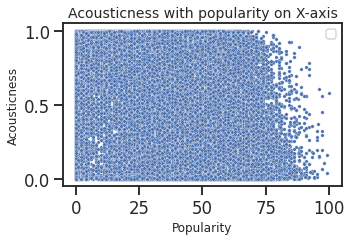

No handles with labels found to put in legend.


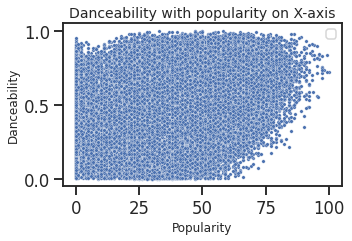

No handles with labels found to put in legend.


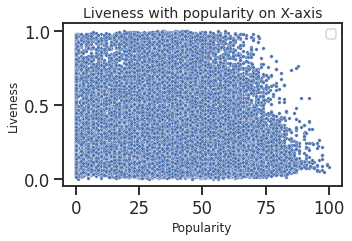

No handles with labels found to put in legend.


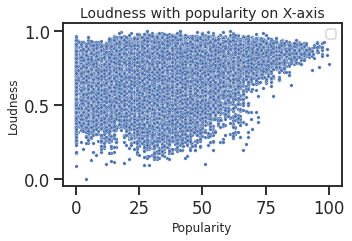

No handles with labels found to put in legend.


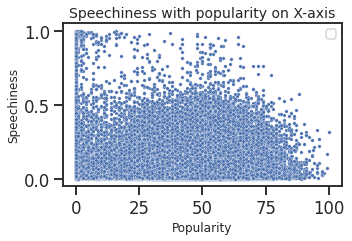

No handles with labels found to put in legend.


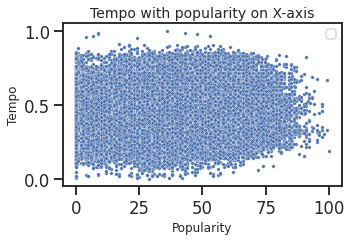

No handles with labels found to put in legend.


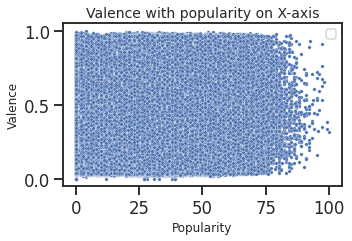

In [ ]:
scat_plot(data.popularity, data.acousticness, xlab='Popularity',\
         ylab='Acousticness', titl='Acousticness with popularity on X-axis')
scat_plot(data.popularity, data.danceability, xlab='Popularity',\
         ylab='Danceability', titl='Danceability with popularity on X-axis')
scat_plot(data.popularity, data.liveness, xlab='Popularity',\
         ylab='Liveness', titl='Liveness with popularity on X-axis')
scat_plot(data.popularity, data.loudness, xlab='Popularity',\
         ylab='Loudness', titl='Loudness with popularity on X-axis')
scat_plot(data.popularity, data.speechiness, xlab='Popularity',\
         ylab='Speechiness', titl='Speechiness with popularity on X-axis')
scat_plot(data.popularity, data.tempo, xlab='Popularity',\
         ylab='Tempo', titl='Tempo with popularity on X-axis')
scat_plot(data.popularity, data.valence, xlab='Popularity',\
         ylab='Valence', titl='Valence with popularity on X-axis')

For Populary Songs:
* Acousticness: Low
* Dancability: High
* Liveness: Low
* Loundness: High
* Speechiness: Low
* Tempo: Not significant
* Valence: Not significant

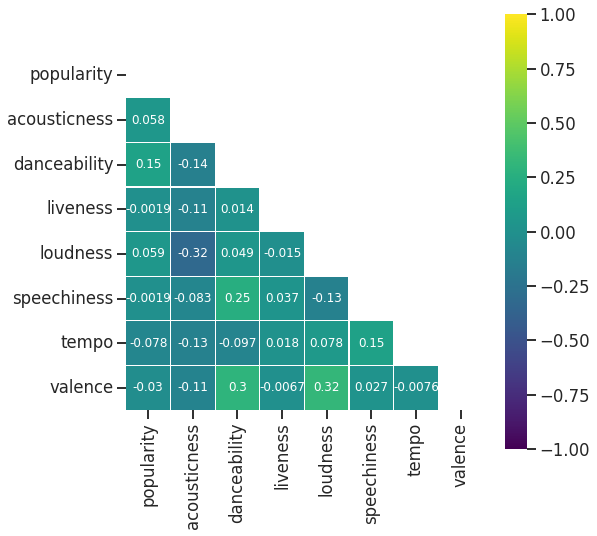

In [ ]:
# Correlation of most popular songs
#data_top_1_perc = data.nlargest(int(len(data_all)*0.01),'popularity')
data_top_songs = data.nlargest(500,'popularity')

corr = data_top_songs.corr()
fig, ax = plt.subplots(figsize=(8,8)) 
ax = sns.heatmap(corr, mask=np.triu(corr),
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True);

Text(0.5, 1.0, 'Popularity Distribution')

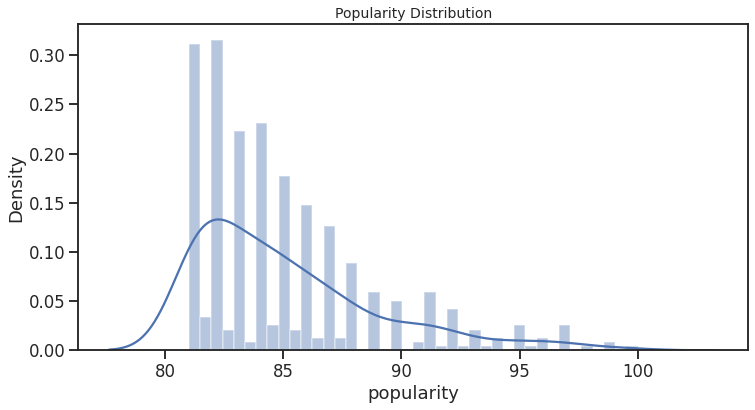

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(data_top_songs.popularity, bins=40)
plt.title('Popularity Distribution', fontsize=14)

In [ ]:
n = 100
input_song = data_all.tail(1).copy()
data = data_all
category_name = "All"

# Min max scale data
scaler = MinMaxScaler()
num_data = data.select_dtypes(exclude=['object'])
num_data = num_data.drop(['popularity'], axis=1)
scaler = scaler.fit(num_data)
data = data.drop(num_data.columns, axis=1)
data[num_data.columns] = scaler.transform(num_data)

# Min max scale input song
num_input_song = input_song.select_dtypes(exclude=['object'])
num_input_song = num_input_song.drop(['popularity'], axis=1)
input_song = input_song.drop(num_input_song.columns, axis=1)
input_song[num_input_song.columns] = scaler.transform(num_input_song)

# Top n number of songs 
data_top_songs = data.nlargest(n, 'popularity')

# Mean features of top songs
data_top_songs_mean = data_top_songs._get_numeric_data().drop(["popularity"], axis=1).mean()

# Each attribute we'll plot in the radar chart.
labels = data_top_songs_mean.index.tolist()

# Values to plot
data_values = data_top_songs_mean.values.tolist()
input_values = input_song._get_numeric_data().drop(["popularity"], axis=1).values.flatten().tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
data_values += data_values[:1]
input_values += input_values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plot_label_data = f"The Mean Audio Features of the Top {n} {category_name} Songs"
plot_label_input_song = f"The Audio Features of \"{input_song['track_name'].values.tolist()[0]}\" by \"{input_song['artist_name'].values.tolist()[0]}\""

# Draw the outline of our data.
ax.plot(angles, data_values, color='blue', linewidth=1, label=plot_label_data)
# Fill it in.
ax.fill(angles, data_values, color='blue', alpha=0.25)
# Draw the outline of our data.
ax.plot(angles, input_values, color='red', linewidth=1, label=plot_label_input_song)
# Fill it in.
ax.fill(angles, input_values, color='red', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)
#ax.set_title(f'{plot_label_input_song} vs. {plot_label_data}', y=1.2)
ax.legend(loc='upper right', bbox_to_anchor=(2.5, 1.2))

NameError: ignored

Text(0.5, 1.2, 'The Mean Audio Features of the Top 100 Songs All Time')

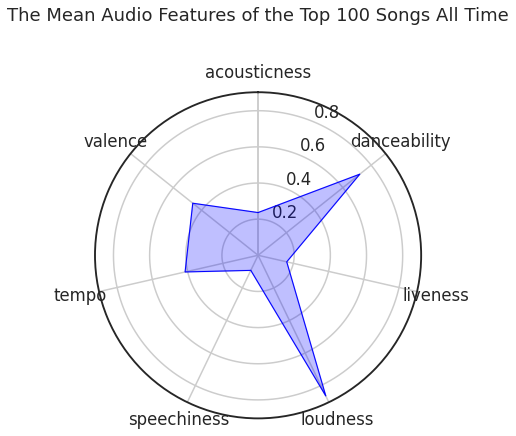

In [ ]:
n = 100
data = get_data(path_all)
category_name = "All Time"

# Min max scale data
scaler = MinMaxScaler()
num_data = data.select_dtypes(exclude=['object'])
num_data = num_data.drop(['popularity'], axis=1)
scaler = scaler.fit(num_data)
data = data.drop(num_data.columns, axis=1)
data[num_data.columns] = scaler.transform(num_data)

# Top n number of songs 
data_top_songs = data.nlargest(n, 'popularity')

# Mean features of top songs
data_top_songs_mean = data_top_songs._get_numeric_data().drop(["popularity"], axis=1).mean()

# Each attribute we'll plot in the radar chart.
labels = data_top_songs_mean.index.tolist()

# Values to plot
data_values = data_top_songs_mean.values.tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
data_values += data_values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plot_label_data = f"The Mean Audio Features of the Top {n} Songs {category_name}"

# Draw the outline of our data.
ax.plot(angles, data_values, color='blue', linewidth=1, label=plot_label_data)
# Fill it in.
ax.fill(angles, data_values, color='blue', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_title(plot_label_data, y=1.2)
#ax.legend(loc='upper right', bbox_to_anchor=(2.5, 1.2))

Text(0.5, 1.2, 'The Mean Audio Features of the Top 1000 Songs All Time')

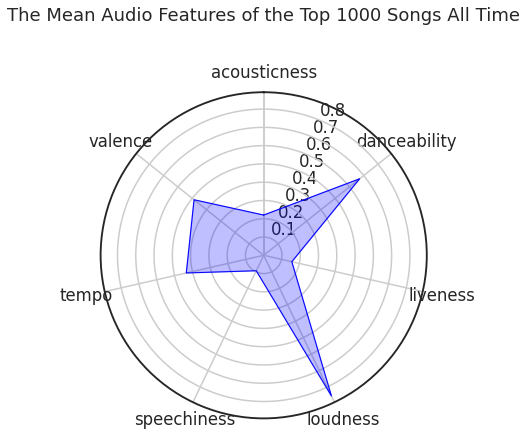

In [ ]:
n = 1000
data = get_data(path_all)
category_name = "All Time"

# Min max scale data
scaler = MinMaxScaler()
num_data = data.select_dtypes(exclude=['object'])
num_data = num_data.drop(['popularity'], axis=1)
scaler = scaler.fit(num_data)
data = data.drop(num_data.columns, axis=1)
data[num_data.columns] = scaler.transform(num_data)

# Top n number of songs 
data_top_songs = data.nlargest(n, 'popularity')

# Mean features of top songs
data_top_songs_mean = data_top_songs._get_numeric_data().drop(["popularity"], axis=1).mean()

# Each attribute we'll plot in the radar chart.
labels = data_top_songs_mean.index.tolist()

# Values to plot
data_values = data_top_songs_mean.values.tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
data_values += data_values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plot_label_data = f"The Mean Audio Features of the Top {n} Songs {category_name}"

# Draw the outline of our data.
ax.plot(angles, data_values, color='blue', linewidth=1, label=plot_label_data)
# Fill it in.
ax.fill(angles, data_values, color='blue', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_title(plot_label_data, y=1.2)
#ax.legend(loc='upper right', bbox_to_anchor=(2.5, 1.2))

Text(0.5, 1.2, 'The Mean Audio Features of the Top 10000 Songs All Time')

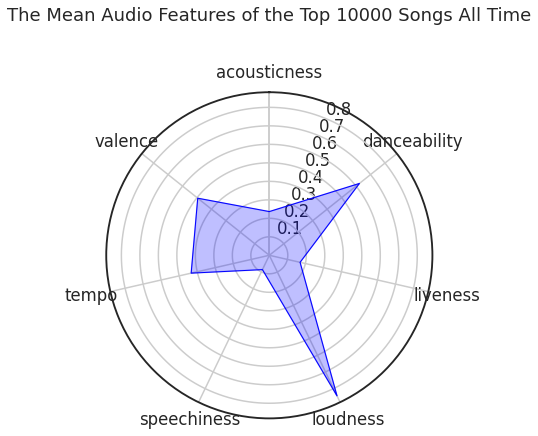

In [ ]:
n = 10000
data = get_data(path_all)
category_name = "All Time"

# Min max scale data
scaler = MinMaxScaler()
num_data = data.select_dtypes(exclude=['object'])
num_data = num_data.drop(['popularity'], axis=1)
scaler = scaler.fit(num_data)
data = data.drop(num_data.columns, axis=1)
data[num_data.columns] = scaler.transform(num_data)

# Top n number of songs 
data_top_songs = data.nlargest(n, 'popularity')

# Mean features of top songs
data_top_songs_mean = data_top_songs._get_numeric_data().drop(["popularity"], axis=1).mean()

# Each attribute we'll plot in the radar chart.
labels = data_top_songs_mean.index.tolist()

# Values to plot
data_values = data_top_songs_mean.values.tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
data_values += data_values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plot_label_data = f"The Mean Audio Features of the Top {n} Songs {category_name}"

# Draw the outline of our data.
ax.plot(angles, data_values, color='blue', linewidth=1, label=plot_label_data)
# Fill it in.
ax.fill(angles, data_values, color='blue', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_title(plot_label_data, y=1.2)
#ax.legend(loc='upper right', bbox_to_anchor=(2.5, 1.2))

Text(0.5, 1.2, 'The Mean Audio Features of the Top 1000 Country Songs')

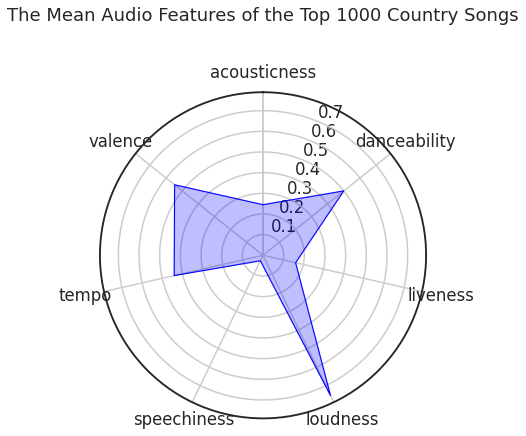

In [ ]:
n = 1000
category = 10
data = select_data(category)
category_name = CATEGORY_DICT[category]

# Min max scale data
scaler = MinMaxScaler()
num_data = data.select_dtypes(exclude=['object'])
num_data = num_data.drop(['popularity'], axis=1)
scaler = scaler.fit(num_data)
data = data.drop(num_data.columns, axis=1)
data[num_data.columns] = scaler.transform(num_data)

# Top n number of songs 
data_top_songs = data.nlargest(n, 'popularity')

# Mean features of top songs
data_top_songs_mean = data_top_songs._get_numeric_data().drop(["popularity"], axis=1).mean()

# Each attribute we'll plot in the radar chart.
labels = data_top_songs_mean.index.tolist()

# Values to plot
data_values = data_top_songs_mean.values.tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
data_values += data_values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plot_label_data = f"The Mean Audio Features of the Top {n} {category_name} Songs"

# Draw the outline of our data.
ax.plot(angles, data_values, color='blue', linewidth=1, label=plot_label_data)
# Fill it in.
ax.fill(angles, data_values, color='blue', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_title(plot_label_data, y=1.2)
#ax.legend(loc='upper right', bbox_to_anchor=(2.5, 1.2))

Text(0.5, 1.2, 'The Mean Audio Features of the Top 1000 Indie Songs')

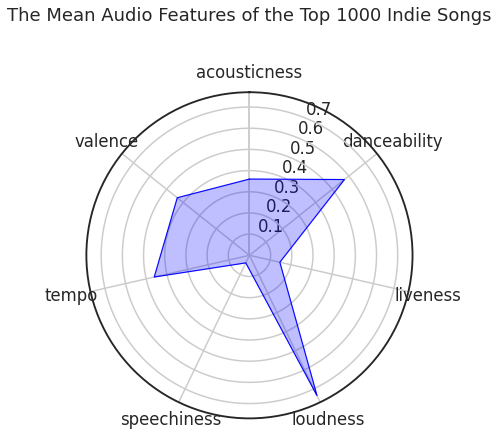

In [ ]:
n = 1000
category = 15
data = select_data(category)
category_name = CATEGORY_DICT[category]

# Min max scale data
scaler = MinMaxScaler()
num_data = data.select_dtypes(exclude=['object'])
num_data = num_data.drop(['popularity'], axis=1)
scaler = scaler.fit(num_data)
data = data.drop(num_data.columns, axis=1)
data[num_data.columns] = scaler.transform(num_data)

# Top n number of songs 
data_top_songs = data.nlargest(n, 'popularity')

# Mean features of top songs
data_top_songs_mean = data_top_songs._get_numeric_data().drop(["popularity"], axis=1).mean()

# Each attribute we'll plot in the radar chart.
labels = data_top_songs_mean.index.tolist()

# Values to plot
data_values = data_top_songs_mean.values.tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
data_values += data_values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plot_label_data = f"The Mean Audio Features of the Top {n} {category_name} Songs"

# Draw the outline of our data.
ax.plot(angles, data_values, color='blue', linewidth=1, label=plot_label_data)
# Fill it in.
ax.fill(angles, data_values, color='blue', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_title(plot_label_data, y=1.2)
#ax.legend(loc='upper right', bbox_to_anchor=(2.5, 1.2))

Text(0.5, 1.2, 'The Mean Audio Features of the Top 1000 R&B Songs')

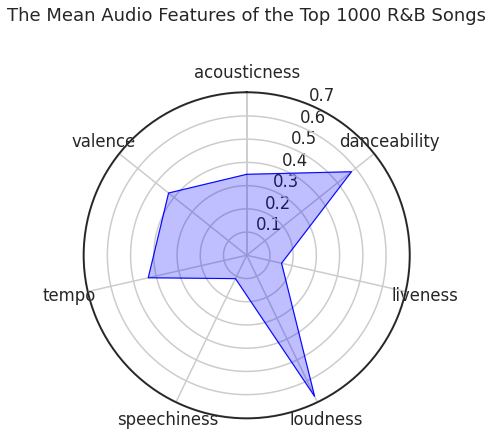

In [ ]:
n = 1000
category = 20
data = select_data(category)
category_name = CATEGORY_DICT[category]

# Min max scale data
scaler = MinMaxScaler()
num_data = data.select_dtypes(exclude=['object'])
num_data = num_data.drop(['popularity'], axis=1)
scaler = scaler.fit(num_data)
data = data.drop(num_data.columns, axis=1)
data[num_data.columns] = scaler.transform(num_data)

# Top n number of songs 
data_top_songs = data.nlargest(n, 'popularity')

# Mean features of top songs
data_top_songs_mean = data_top_songs._get_numeric_data().drop(["popularity"], axis=1).mean()

# Each attribute we'll plot in the radar chart.
labels = data_top_songs_mean.index.tolist()

# Values to plot
data_values = data_top_songs_mean.values.tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
data_values += data_values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plot_label_data = f"The Mean Audio Features of the Top {n} {category_name} Songs"

# Draw the outline of our data.
ax.plot(angles, data_values, color='blue', linewidth=1, label=plot_label_data)
# Fill it in.
ax.fill(angles, data_values, color='blue', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_title(plot_label_data, y=1.2)
#ax.legend(loc='upper right', bbox_to_anchor=(2.5, 1.2))

Text(0.5, 1.2, 'The Mean Audio Features of the Top 1000 A Capella Songs')

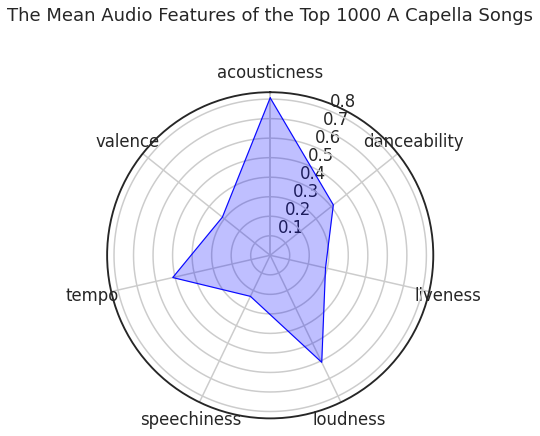

In [ ]:
n = 1000
category = 6
data = select_data(category)
category_name = CATEGORY_DICT[category]

# Min max scale data
scaler = MinMaxScaler()
num_data = data.select_dtypes(exclude=['object'])
num_data = num_data.drop(['popularity'], axis=1)
scaler = scaler.fit(num_data)
data = data.drop(num_data.columns, axis=1)
data[num_data.columns] = scaler.transform(num_data)

# Top n number of songs 
data_top_songs = data.nlargest(n, 'popularity')

# Mean features of top songs
data_top_songs_mean = data_top_songs._get_numeric_data().drop(["popularity"], axis=1).mean()

# Each attribute we'll plot in the radar chart.
labels = data_top_songs_mean.index.tolist()

# Values to plot
data_values = data_top_songs_mean.values.tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
data_values += data_values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plot_label_data = f"The Mean Audio Features of the Top {n} {category_name} Songs"

# Draw the outline of our data.
ax.plot(angles, data_values, color='blue', linewidth=1, label=plot_label_data)
# Fill it in.
ax.fill(angles, data_values, color='blue', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_title(plot_label_data, y=1.2)
#ax.legend(loc='upper right', bbox_to_anchor=(2.5, 1.2))

Text(0.5, 1.2, 'The Mean Audio Features of the Top 1000 Rap Songs')

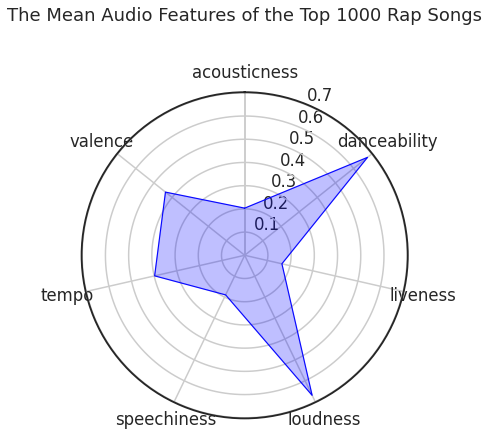

In [ ]:
n = 1000
category = 21
data = select_data(category)
category_name = CATEGORY_DICT[category]

# Min max scale data
scaler = MinMaxScaler()
num_data = data.select_dtypes(exclude=['object'])
num_data = num_data.drop(['popularity'], axis=1)
scaler = scaler.fit(num_data)
data = data.drop(num_data.columns, axis=1)
data[num_data.columns] = scaler.transform(num_data)

# Top n number of songs 
data_top_songs = data.nlargest(n, 'popularity')

# Mean features of top songs
data_top_songs_mean = data_top_songs._get_numeric_data().drop(["popularity"], axis=1).mean()

# Each attribute we'll plot in the radar chart.
labels = data_top_songs_mean.index.tolist()

# Values to plot
data_values = data_top_songs_mean.values.tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
data_values += data_values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plot_label_data = f"The Mean Audio Features of the Top {n} {category_name} Songs"

# Draw the outline of our data.
ax.plot(angles, data_values, color='blue', linewidth=1, label=plot_label_data)
# Fill it in.
ax.fill(angles, data_values, color='blue', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_title(plot_label_data, y=1.2)
#ax.legend(loc='upper right', bbox_to_anchor=(2.5, 1.2))

Text(0.5, 1.2, 'The Mean Audio Features of the Top 1000 Blues Songs')

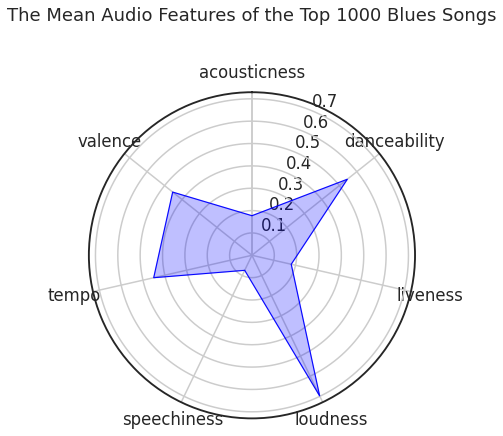

In [ ]:
n = 1000
category = 8
data = select_data(category)
category_name = CATEGORY_DICT[category]

# Min max scale data
scaler = MinMaxScaler()
num_data = data.select_dtypes(exclude=['object'])
num_data = num_data.drop(['popularity'], axis=1)
scaler = scaler.fit(num_data)
data = data.drop(num_data.columns, axis=1)
data[num_data.columns] = scaler.transform(num_data)

# Top n number of songs 
data_top_songs = data.nlargest(n, 'popularity')

# Mean features of top songs
data_top_songs_mean = data_top_songs._get_numeric_data().drop(["popularity"], axis=1).mean()

# Each attribute we'll plot in the radar chart.
labels = data_top_songs_mean.index.tolist()

# Values to plot
data_values = data_top_songs_mean.values.tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
data_values += data_values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

plot_label_data = f"The Mean Audio Features of the Top {n} {category_name} Songs"

# Draw the outline of our data.
ax.plot(angles, data_values, color='blue', linewidth=1, label=plot_label_data)
# Fill it in.
ax.fill(angles, data_values, color='blue', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_title(plot_label_data, y=1.2)
#ax.legend(loc='upper right', bbox_to_anchor=(2.5, 1.2))